### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv('/content/coupons.csv')

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [7]:
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
data = data.dropna(axis =0, subset = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'])
data = data.drop('car', axis=1)
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


4. What proportion of the total observations chose to accept the coupon?



In [9]:
data['Y'].mean()

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

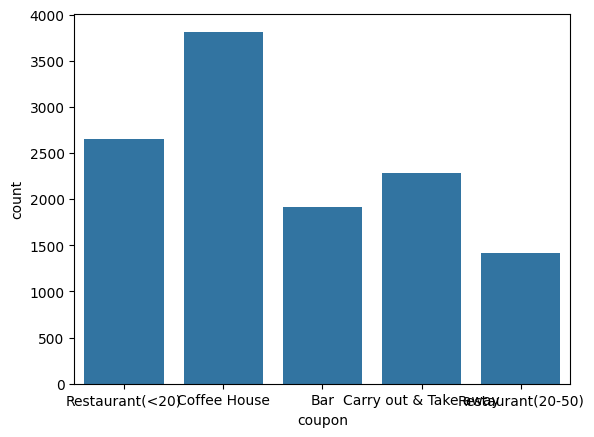

In [10]:
sns.countplot(x='coupon', data=data)
plt.show()

6. Use a histogram to visualize the temperature column.

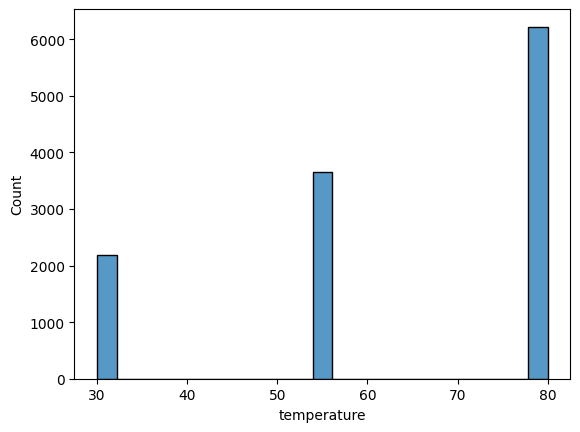

In [11]:
sns.histplot(data['temperature'])
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
df_bar = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [13]:
df_bar['Y'].mean()

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [14]:
df_bar_less = df_bar[df_bar['Bar'].isin(['never','less1','1~3'])]
df_bar_more = df_bar[~df_bar['Bar'].isin(['never','less1','1~3'])]

df_bar_less_mean = df_bar_less['Y'].mean()
df_bar_more_mean = df_bar_more['Y'].mean()

print(df_bar_less_mean)
print(df_bar_more_mean)

0.37267441860465117
0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [15]:
df_bar_over25 = df_bar[(~df_bar['age'].isin(['21','below21']))&(~df_bar['Bar'].isin(['1~3','never']))]
df_other = df_bar[~(df_bar['age'].isin(['21','below21']) & df_bar['Bar'].isin(['1~3','never']))]


print(df_bar_over25['Y'].mean())
print(df_other['Y'].mean())


0.49473684210526314
0.4134078212290503


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [16]:
#try a different method
def get_mean(df,feature1,condition1,feature2,condition2):
    df_1 = df[df[feature1].isin(condition1) & df[feature2].isin(condition2)]
    df_other = df[~(df[feature1].isin(condition1) & df[feature2].isin(condition2))]
    return df_1['Y'].mean(), df_other['Y'].mean()


get_mean(df_bar, 'age', ['21','below21'], 'Bar', ['1~3','never'])

(0.40397350993377484, 0.4134078212290503)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [17]:
df_bar_no_kid_not_widowed = df_bar[(~df_bar['Bar'].isin(['never', 'less1', '1~3'])) & (~df_bar['has_children'].isin(['kids'])) & (~df_bar['maritalStatus'].isin(['widowed']))]
df_bar_under30 = df_bar[(~df_bar['Bar'].isin(['never', 'less1', '1~3'])) & (df_bar['age'].isin(['below21', '21', '26', '31', '36']))]
df_cheap_rest_low_income = data[(data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))]

acceptance_rate_bar_no_kid_not_widowed = df_bar_no_kid_not_widowed['Y'].mean()
acceptance_rate_bar_under30 = df_bar_under30['Y'].mean()
acceptance_rate_cheap_rest_low_income = df_cheap_rest_low_income['Y'].mean()

print("Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed:", acceptance_rate_bar_no_kid_not_widowed)
print("Acceptance rate for drivers who go to bars more than once a month and are under the age of 30:", acceptance_rate_bar_under30)
print("Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K:", acceptance_rate_cheap_rest_low_income)


Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.7616580310880829
Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 0.7604790419161677
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 0.6025293586269196


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [18]:
# prompt: calculate the acceptance rate for different groups from all attribute columns for df_bar

# Loop through all columns in df_bar
for column in df_bar.columns:
  # Skip the 'Y' column (target variable)
  if column != 'Y':
    print(f"\nAcceptance rate for different groups in '{column}' column:")
    # Get unique values in the column
    unique_values = df_bar[column].unique()
    for value in unique_values:
      # Filter the DataFrame based on the current value
      df_group = df_bar[df_bar[column] == value]
      # Calculate the acceptance rate for the group
      acceptance_rate = df_group['Y'].mean()
      # Print the acceptance rate for the group
      print(f"  - Group '{value}': {acceptance_rate:.3f}")




Acceptance rate for different groups in 'destination' column:
  - Group 'No Urgent Place': 0.413
  - Group 'Home': 0.452
  - Group 'Work': 0.368

Acceptance rate for different groups in 'passanger' column:
  - Group 'Friend(s)': 0.566
  - Group 'Alone': 0.409
  - Group 'Kid(s)': 0.206
  - Group 'Partner': 0.388

Acceptance rate for different groups in 'weather' column:
  - Group 'Sunny': 0.443
  - Group 'Rainy': 0.363
  - Group 'Snowy': 0.323

Acceptance rate for different groups in 'temperature' column:
  - Group '80': 0.410
  - Group '55': 0.449
  - Group '30': 0.330

Acceptance rate for different groups in 'time' column:
  - Group '10AM': 0.369
  - Group '6PM': 0.462
  - Group '7AM': 0.368
  - Group '10PM': 0.463
  - Group '2PM': 0.336

Acceptance rate for different groups in 'coupon' column:
  - Group 'Bar': 0.412

Acceptance rate for different groups in 'expiration' column:
  - Group '1d': 0.415
  - Group '2h': 0.400

Acceptance rate for different groups in 'gender' column:
  - G

## Drivers with high probability to accept the coupon have the following characteristics:
- destination is not work
- passenger is not with kids or partner
- weather is sunny
- temperature is not too hot or too cold
- Male is more likely to accept than female
- age is less than 25
- driver is not divorced or have a married partner, single particularly
- with no kid
- lower education tend to have higher tendency
- The higher income, the less likely they accept the coupon
- At least go to bar once a month

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [19]:
df_carry_out_take_away = data[data['coupon'] == 'Carry out & Take away']
for column in df_carry_out_take_away.columns:
  # Skip the 'Y' column (target variable)
  if column != 'Y':
    print(f"\nAcceptance rate for different groups in '{column}' column:")
    # Get unique values in the column
    unique_values = df_carry_out_take_away[column].unique()
    for value in unique_values:
      # Filter the DataFrame based on the current value
      df_group = df_carry_out_take_away[df_carry_out_take_away[column] == value]
      # Calculate the acceptance rate for the group
      acceptance_rate = df_group['Y'].mean()
      # Print the acceptance rate for the group
      print(f"  - Group '{value}': {acceptance_rate:.3f}")



Acceptance rate for different groups in 'destination' column:
  - Group 'No Urgent Place': 0.762
  - Group 'Work': 0.661
  - Group 'Home': 0.792

Acceptance rate for different groups in 'passanger' column:
  - Group 'Friend(s)': 0.760
  - Group 'Alone': 0.732
  - Group 'Kid(s)': 0.697
  - Group 'Partner': 0.717

Acceptance rate for different groups in 'weather' column:
  - Group 'Sunny': 0.764
  - Group 'Rainy': 0.611
  - Group 'Snowy': 0.716

Acceptance rate for different groups in 'temperature' column:
  - Group '80': 0.731
  - Group '55': 0.721
  - Group '30': 0.761

Acceptance rate for different groups in 'time' column:
  - Group '10AM': 0.700
  - Group '2PM': 0.866
  - Group '7AM': 0.661
  - Group '10PM': 0.768
  - Group '6PM': 0.821

Acceptance rate for different groups in 'coupon' column:
  - Group 'Carry out & Take away': 0.738

Acceptance rate for different groups in 'expiration' column:
  - Group '2h': 0.663
  - Group '1d': 0.786

Acceptance rate for different groups in 'gen

# Driver who are more likely to accept coupons for Carry out & Take away have the following characteristics:
- Destination: if the destination is work, drivers are less likely to accept but still with a high probability as 66%
- Passengers: if the passengers are kis, the probability is a bit lower but still close to 70%
- wheather: not rainy
- time: not too early like 7AM
- gender or age group have little influence on the probability
- marrital status: widowed people are more likely to accept
- Income: except for the group with extremly high income - more than 100k
- frequency: at least to have carryout once a month